In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from nsimpkg.random_variables import NormalRV, MixNormalRV, average_normal_dist
from nsimpkg.gaussian_OAIS import AdaGrad_OAIS
from nsimpkg.mcsim import mcsim, rho
from nsimpkg.plotting import plot_contours, plotter, fill_z
np.random.seed(0)

plt.rcParams['figure.dpi'] = 300

q = NormalRV(np.array([10, -10]), np.array([[40, 0], [0, 40]]))
pi = NormalRV(np.array([1, -1]), np.array([[2, -0.5], [-0.5, 2]]))
GT = 0.195595

def phi(x):
    return (np.sum(np.abs(x) < 1, axis=0) == 2).astype(int)

N = 100
Niter = int(1e4)
alpha_AdaGrad = 5*1e-1
nexperiments = 100
results_array_AdaGrad = []
distribution_array_AdaGrad = []
for _ in range(nexperiments):
    r_AdaGrad, d_AdaGrad = AdaGrad_OAIS(phi, pi, q, N, Niter, alpha=alpha_AdaGrad)
    results_array_AdaGrad.append(r_AdaGrad)
    distribution_array_AdaGrad.append(d_AdaGrad)

  1%|▏         | 139/10000 [00:00<00:14, 697.36it/s]

projecting
353.95412836687785


  2%|▏         | 159/10000 [00:00<00:12, 789.29it/s]

projecting
403.0429846662842


100%|██████████| 10000/10000 [00:12<00:00, 806.35it/s]


In [ ]:
import nsimpkg.plotting
# import reload function from importlib
from importlib import reload
reload(nsimpkg.plotting)
from nsimpkg.plotting import plotter

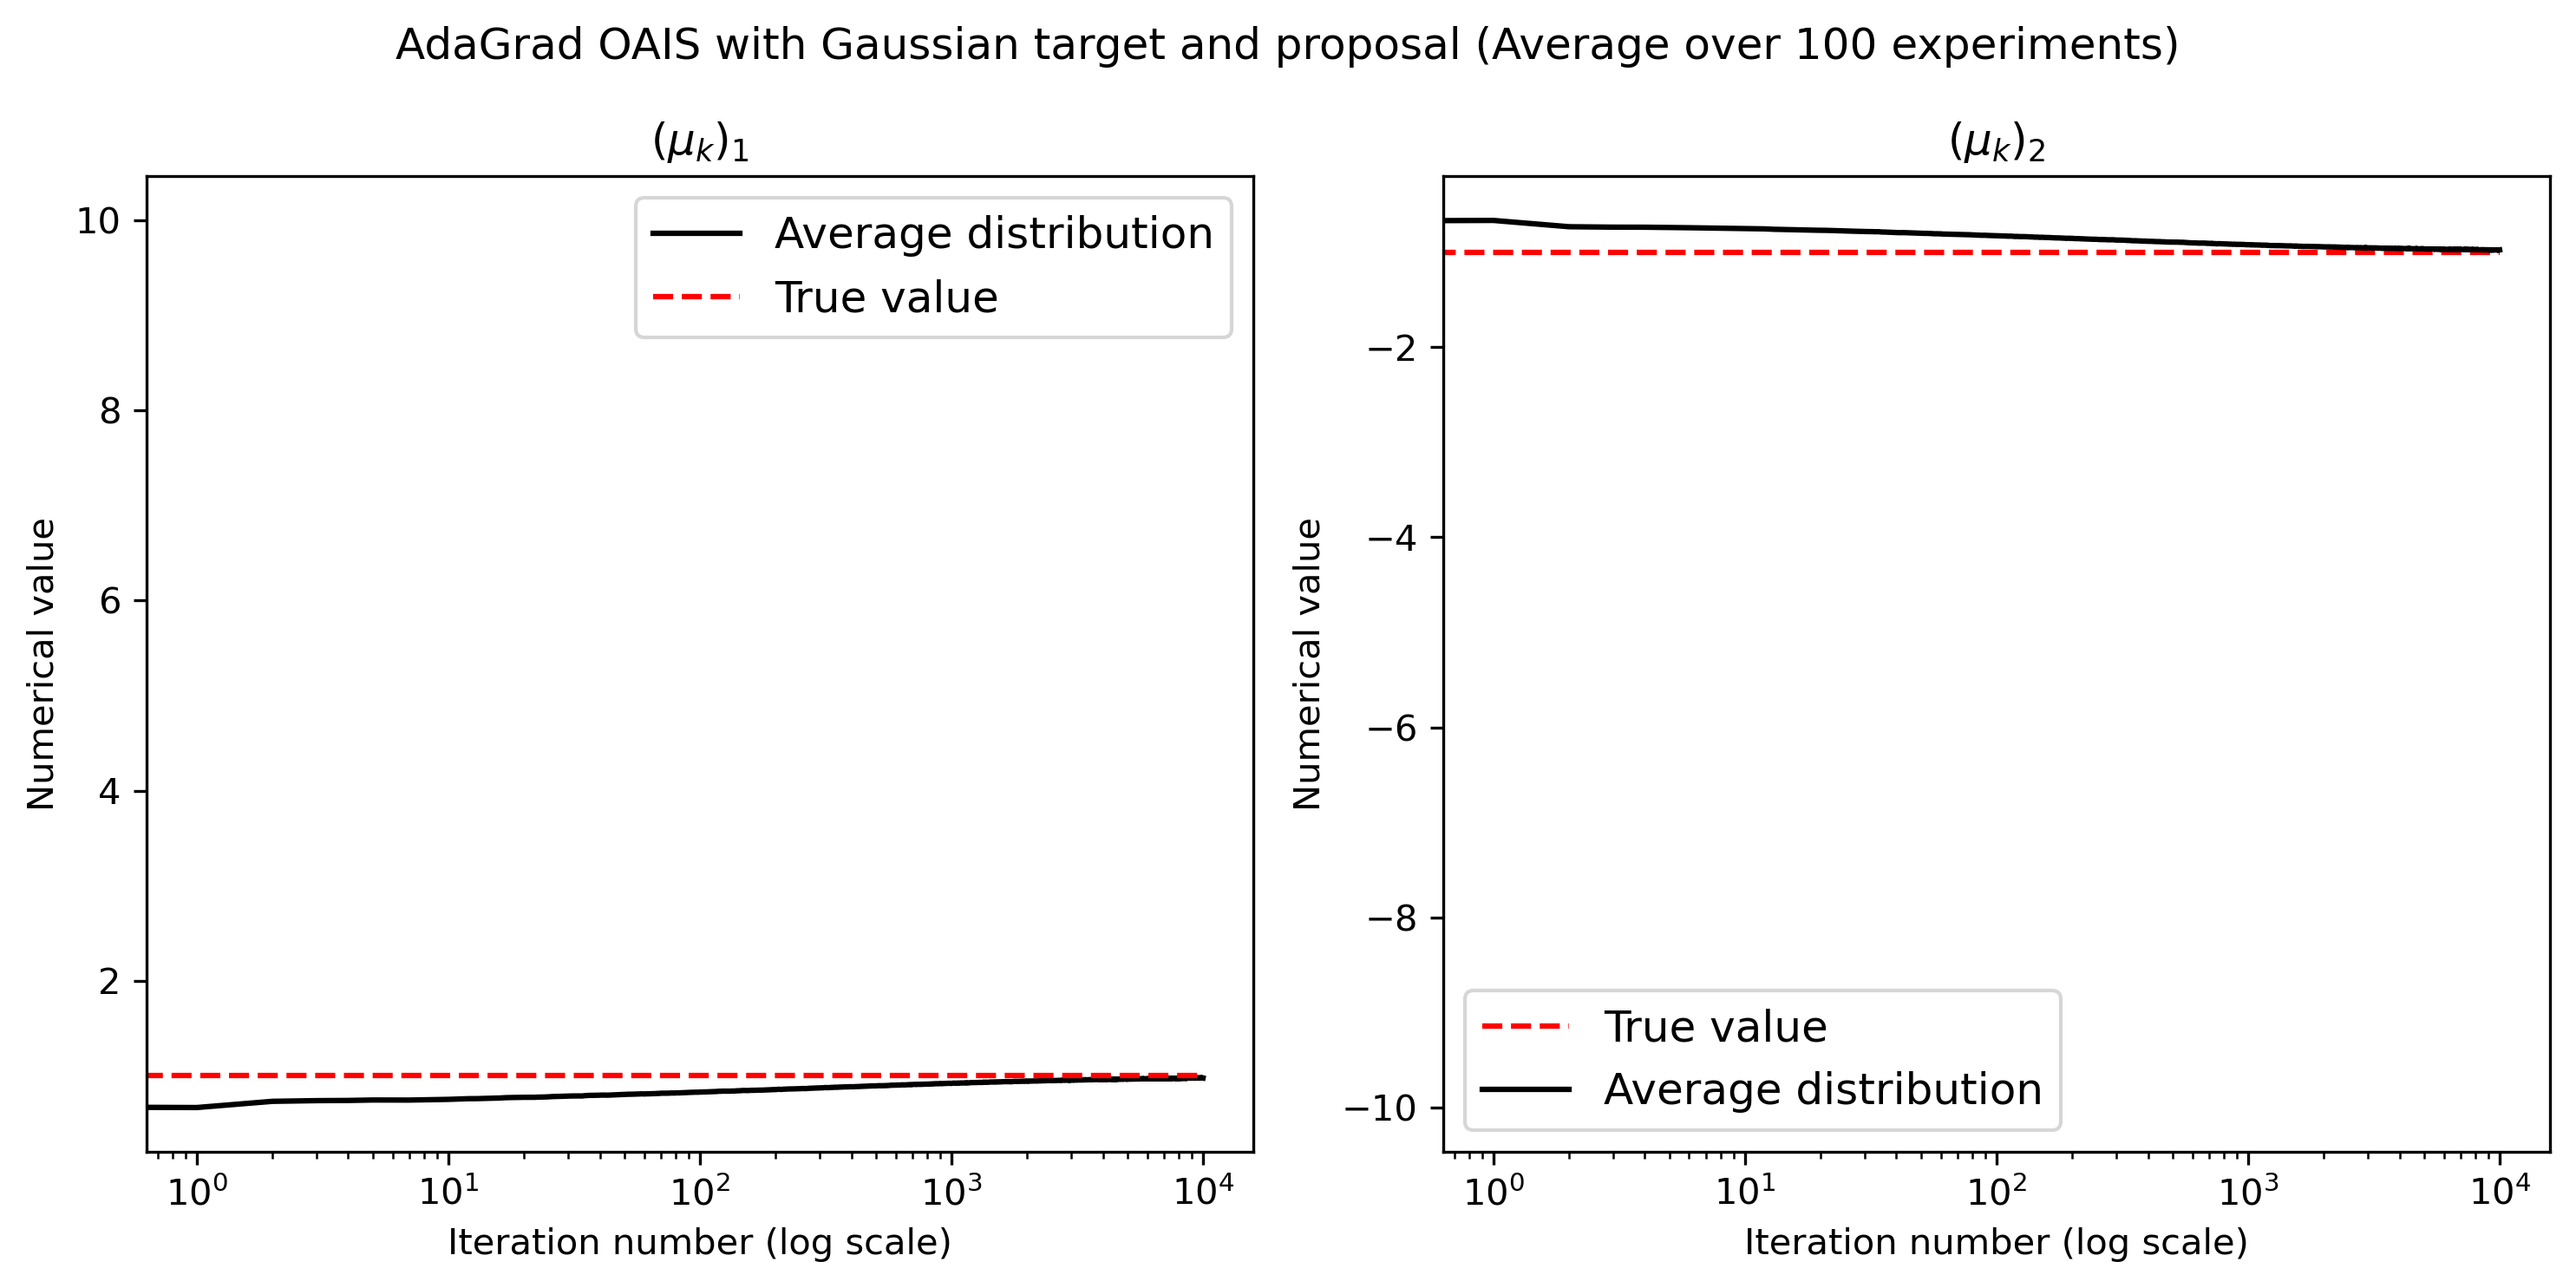

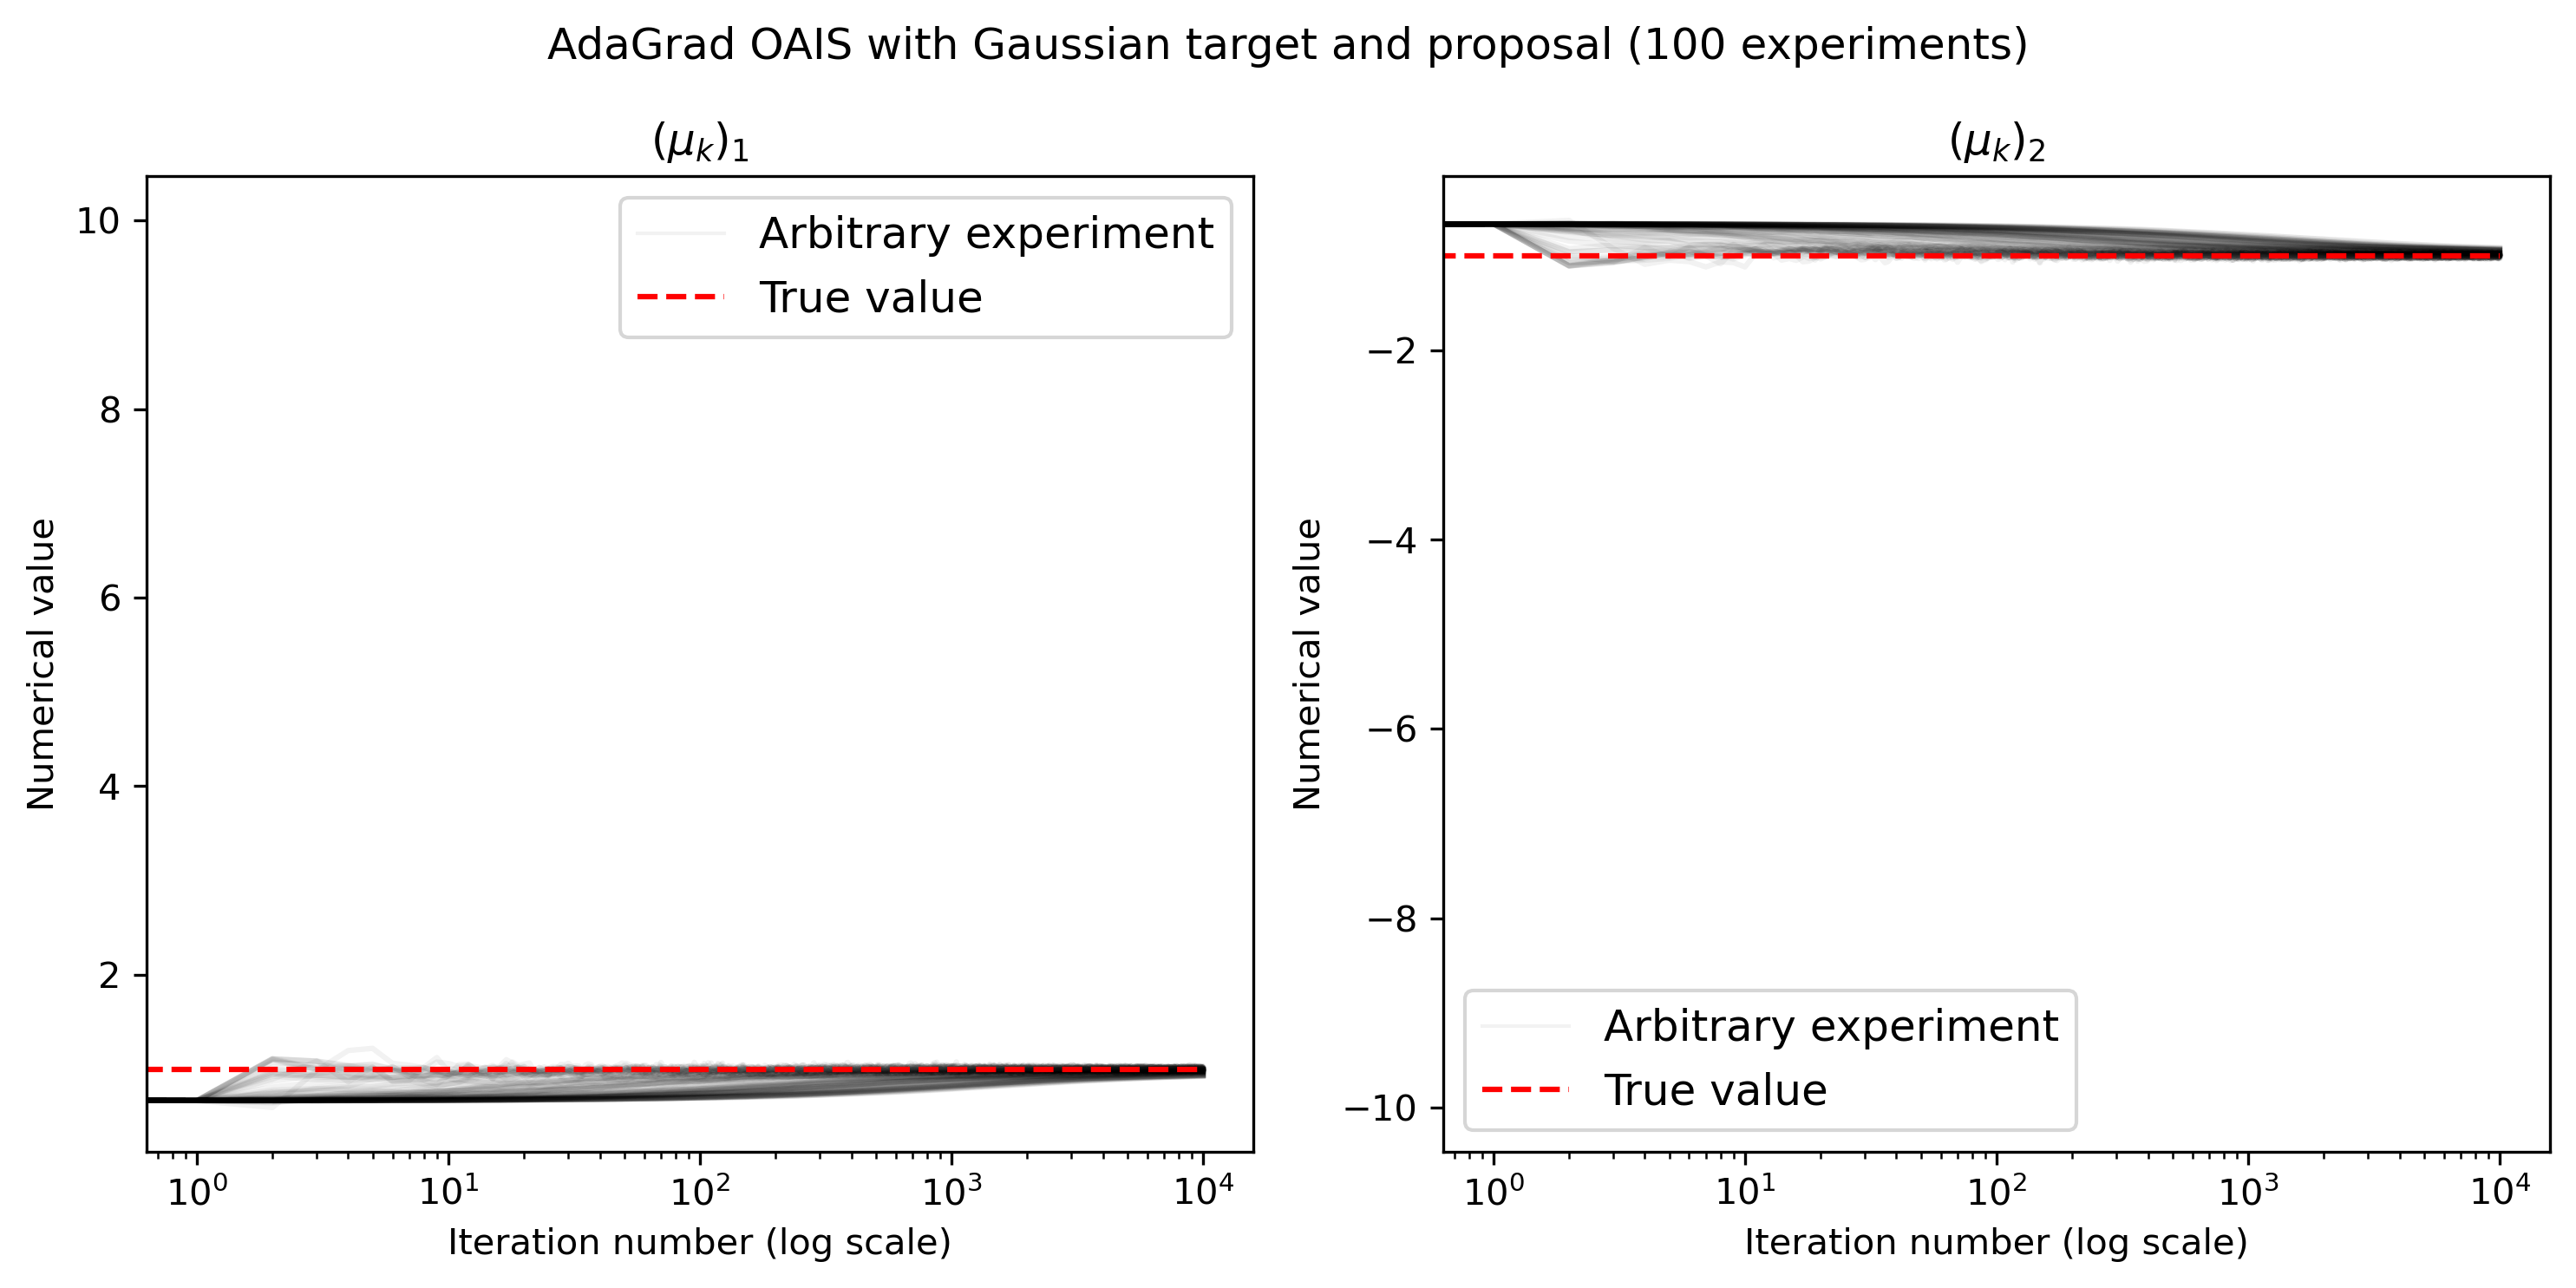

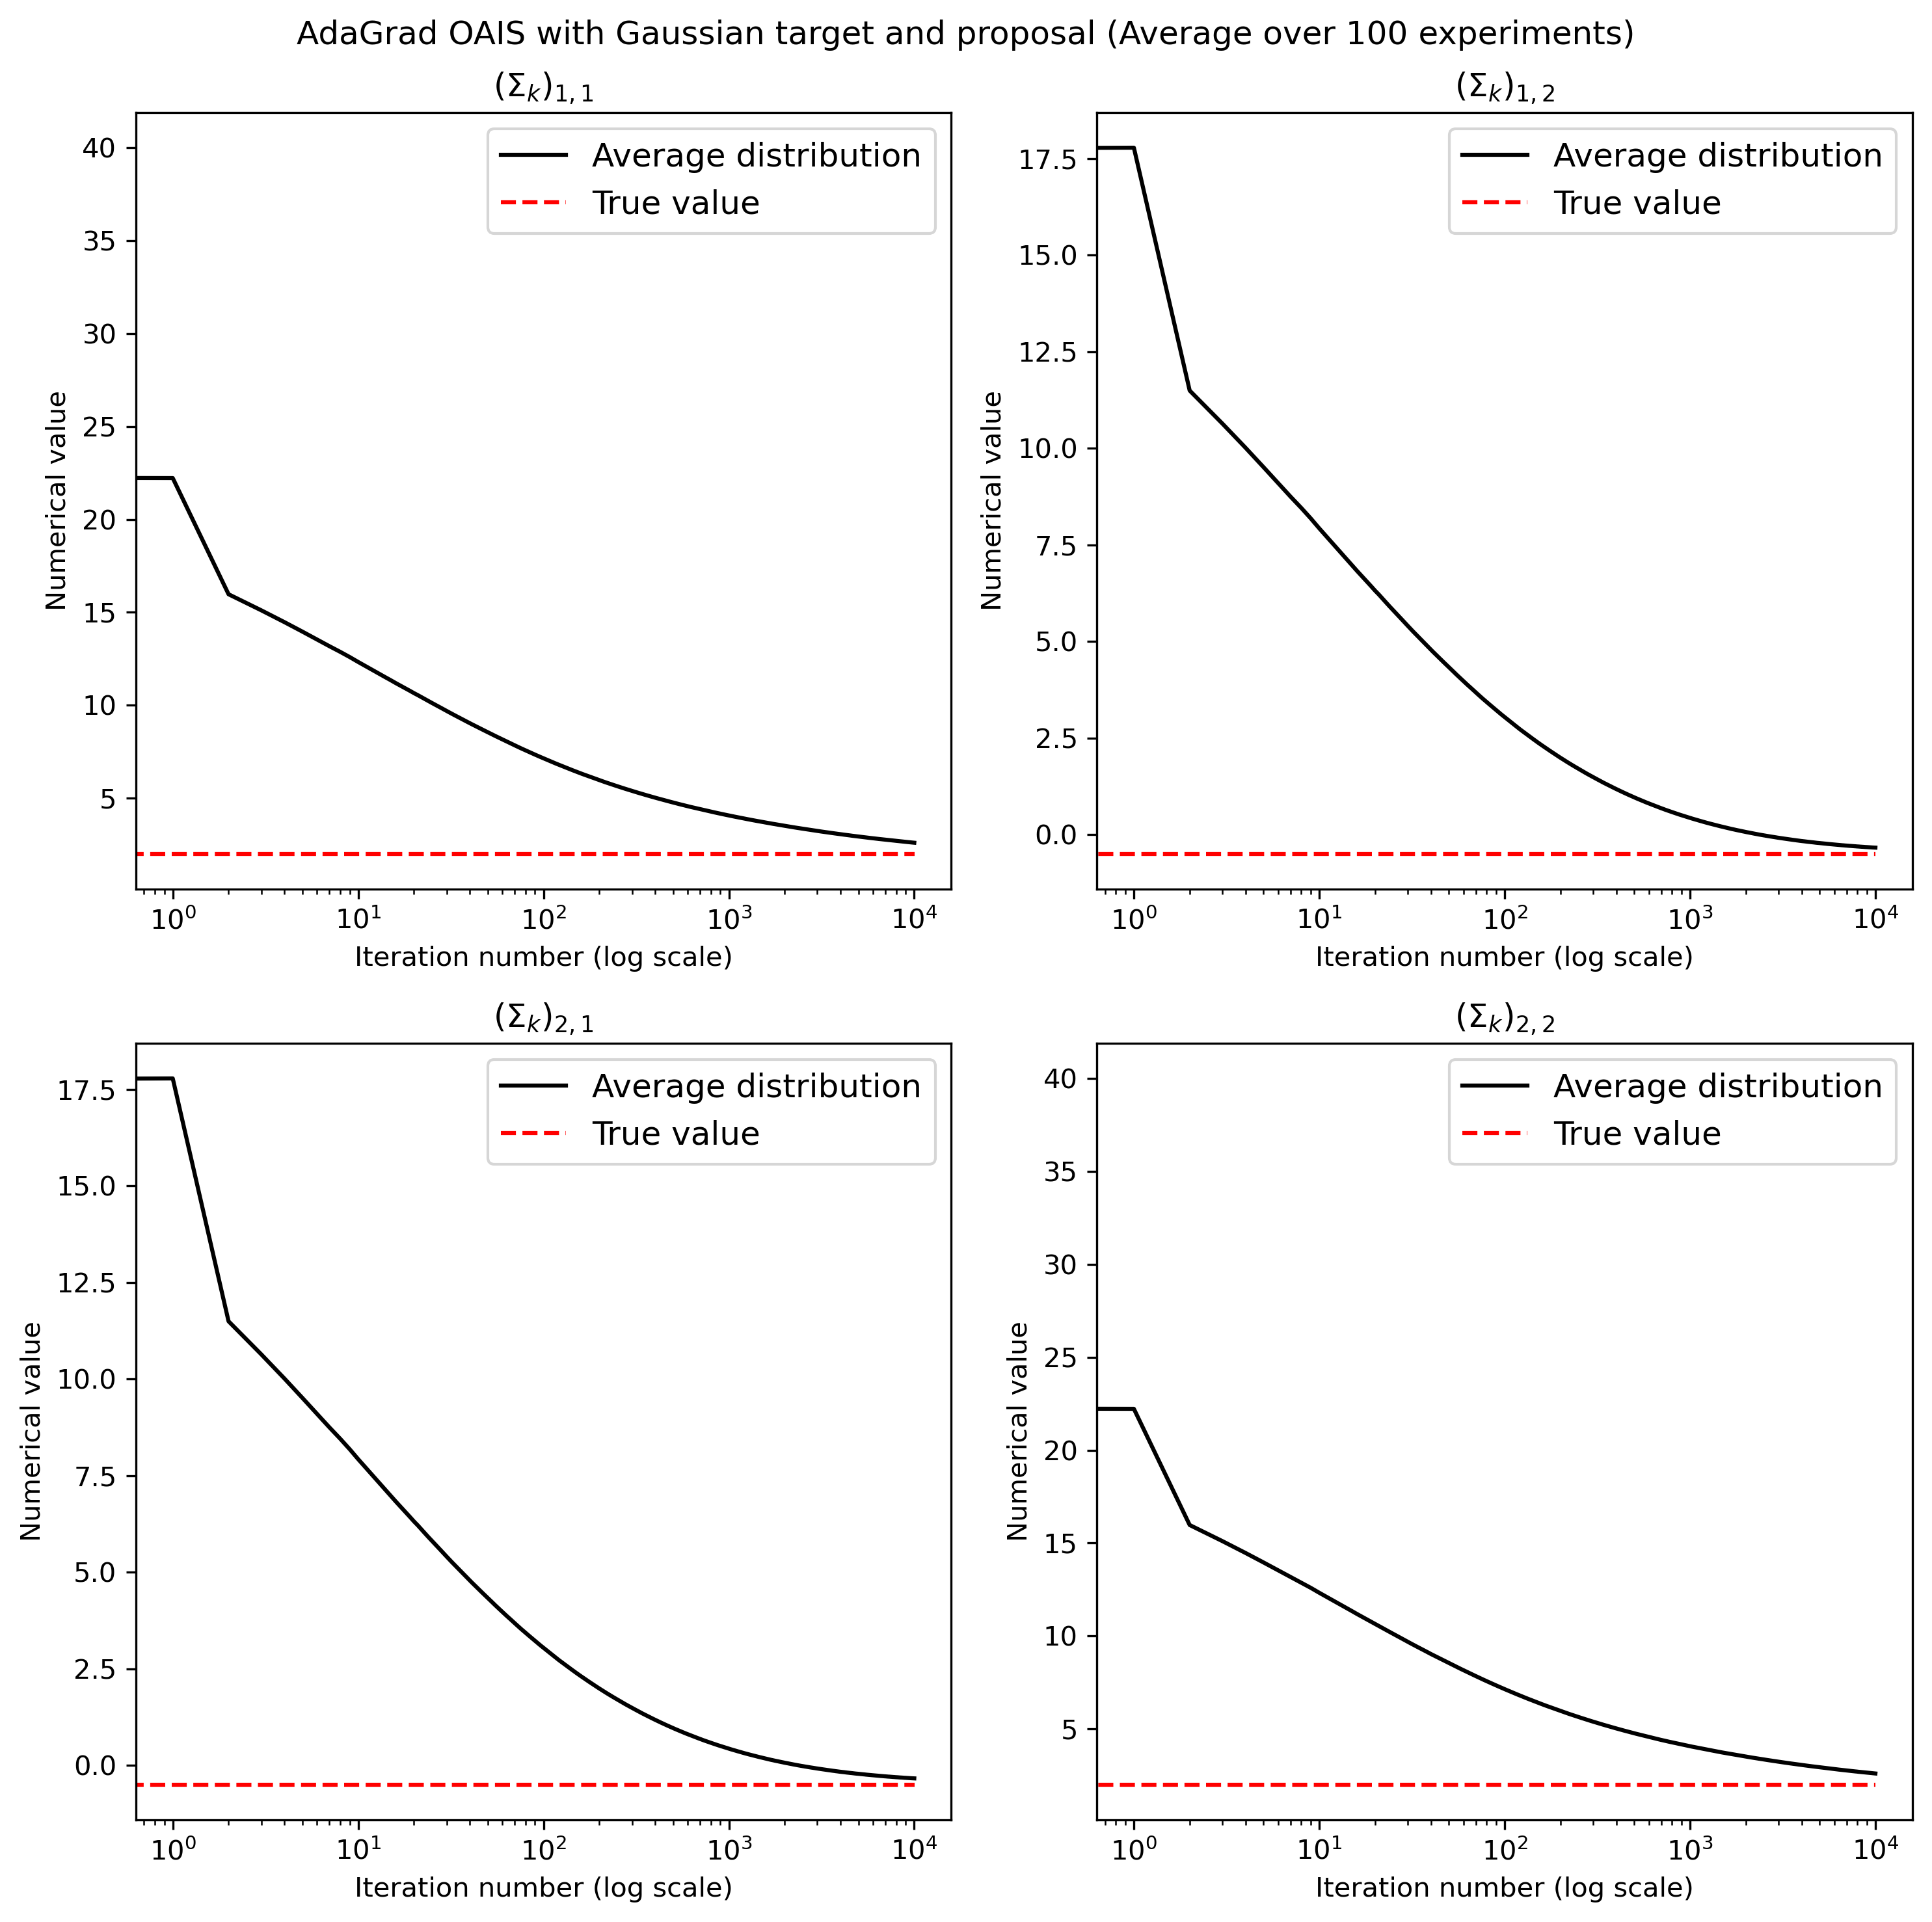

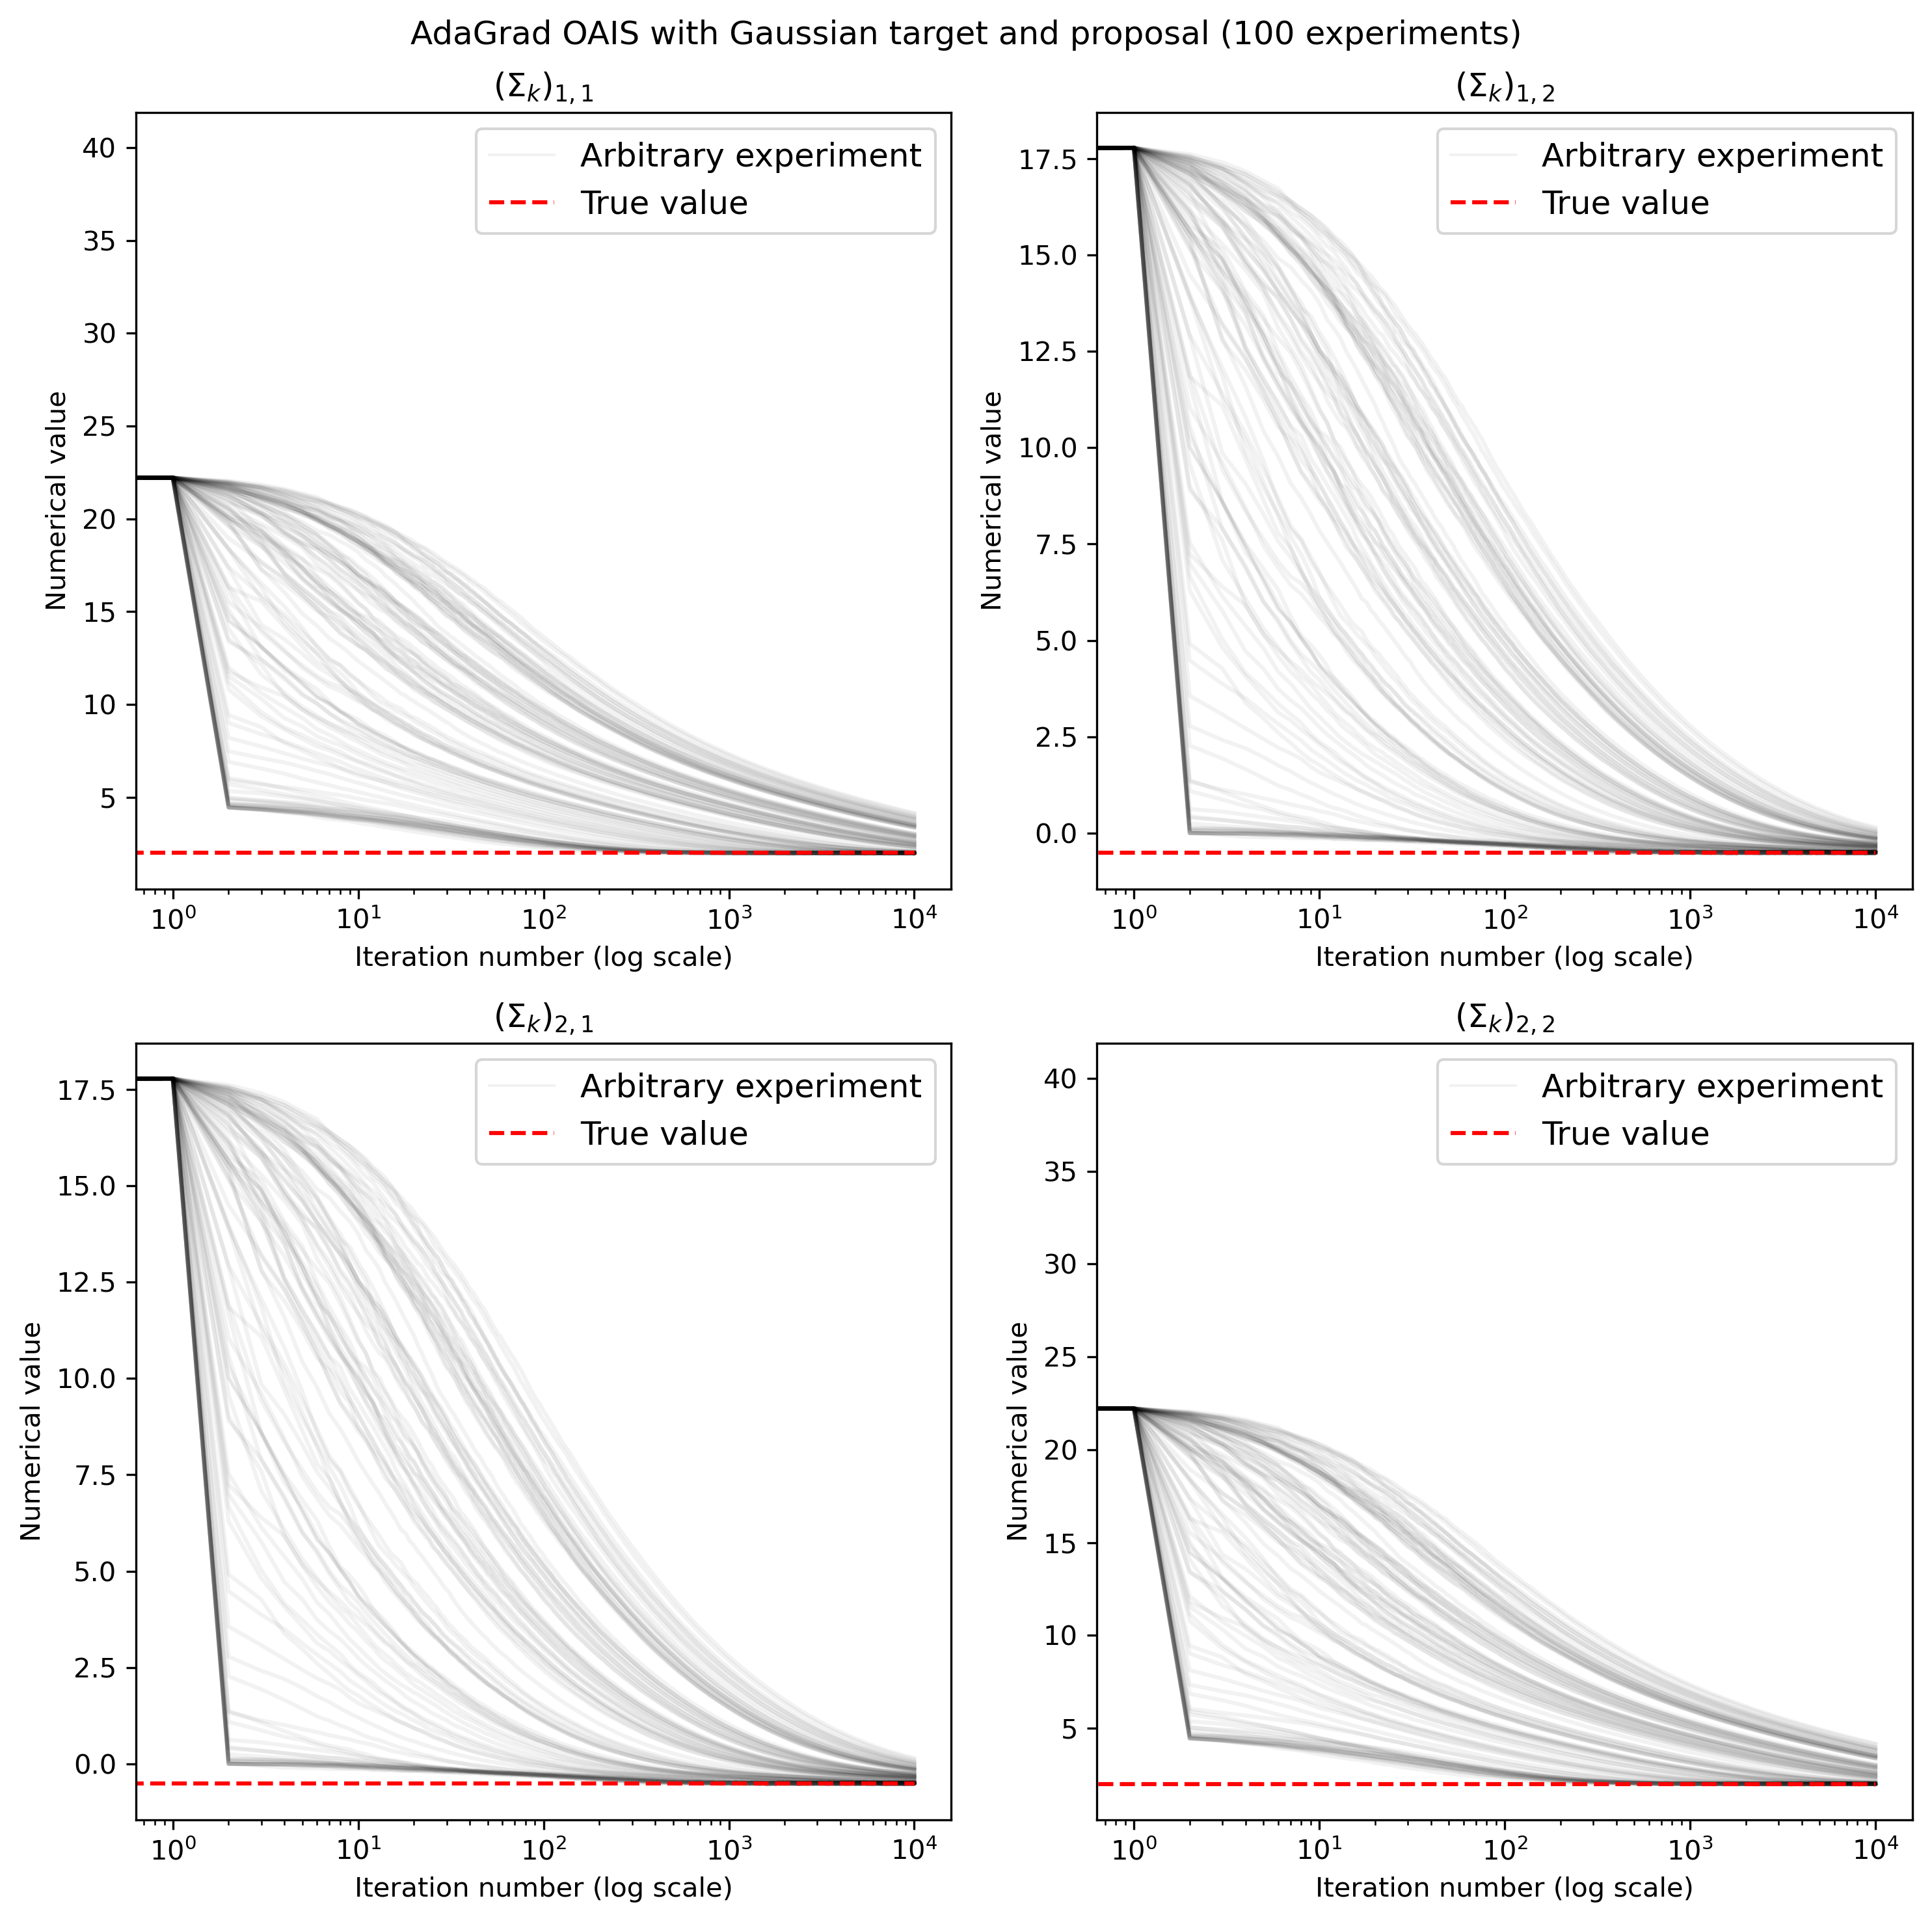

In [ ]:
optimiser = "AdaGrad"
for kind in ["mean", "cov"]:
    for average in [True, False]:
        if average:
            title = f"{optimiser} OAIS with Gaussian target and proposal (Average over {nexperiments} experiments)"
        else:
            title = f"{optimiser} OAIS with Gaussian target and proposal ({nexperiments} experiments)"
        plotter(distribution_array_AdaGrad, pi, title=title, kind=kind, average=average, mix=False, alpha=0.05)
        plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/gaussians/{optimiser}/{optimiser}_{kind}_avg_{average}.png")


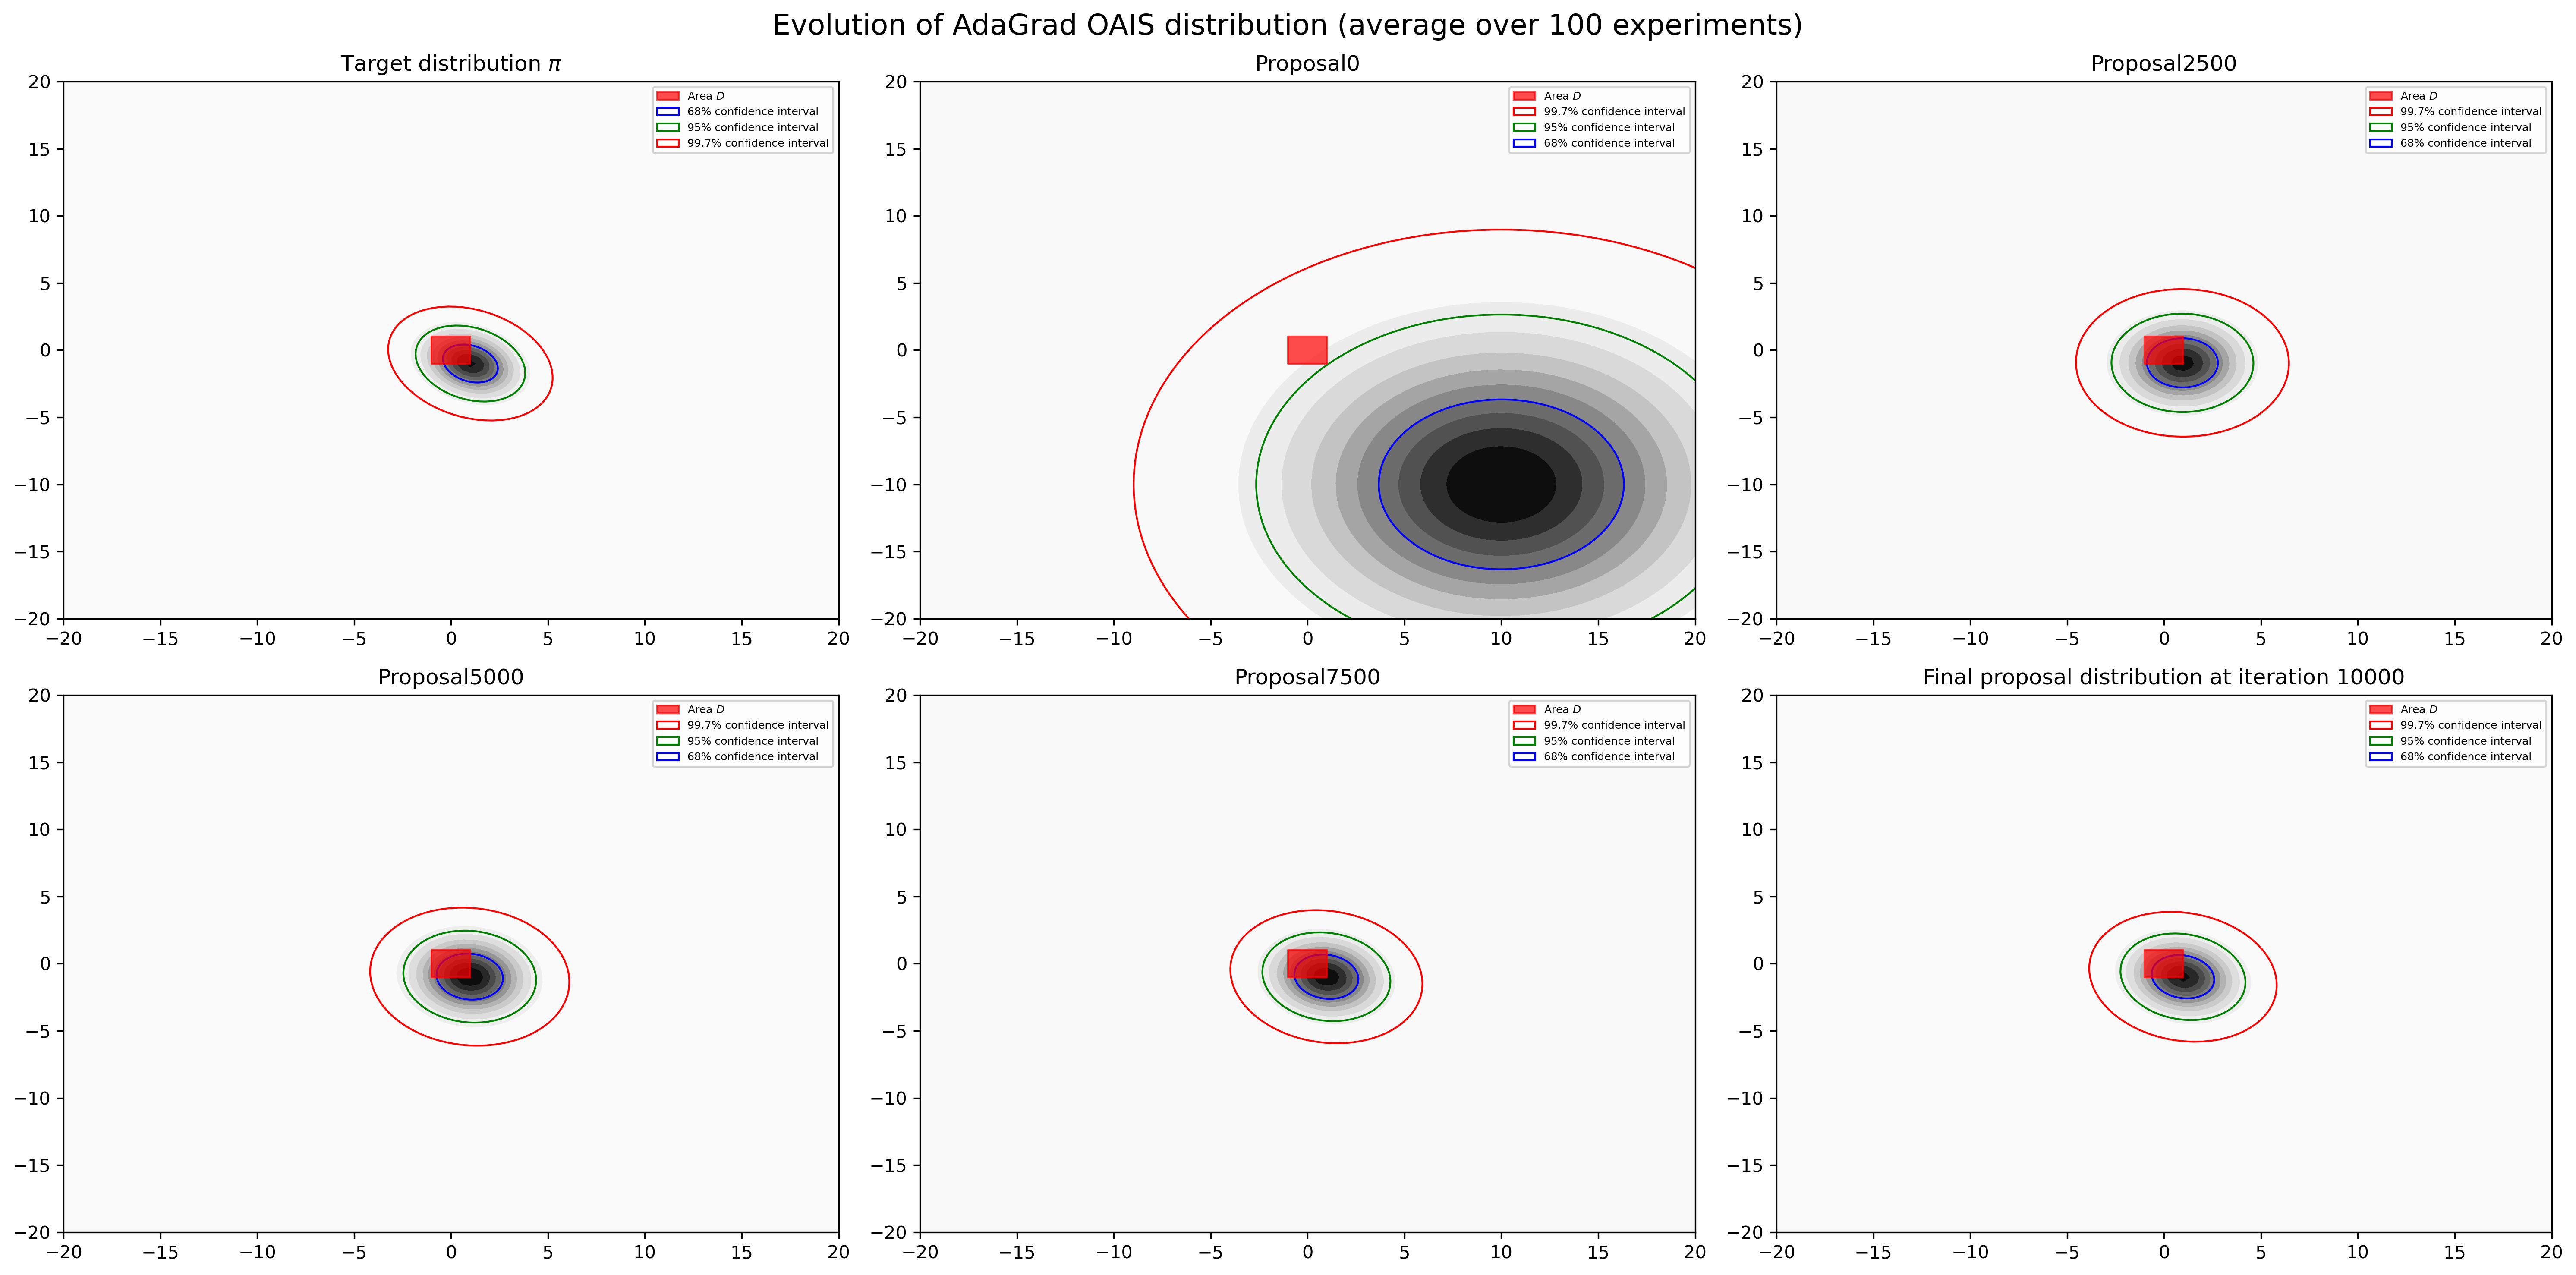

In [ ]:
plot_contours(distribution_array_AdaGrad, pi, title=f"Evolution of {optimiser} OAIS distribution (average over {nexperiments} experiments)", mix=False)
plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/gaussians/{optimiser}/{optimiser}_contours.png")

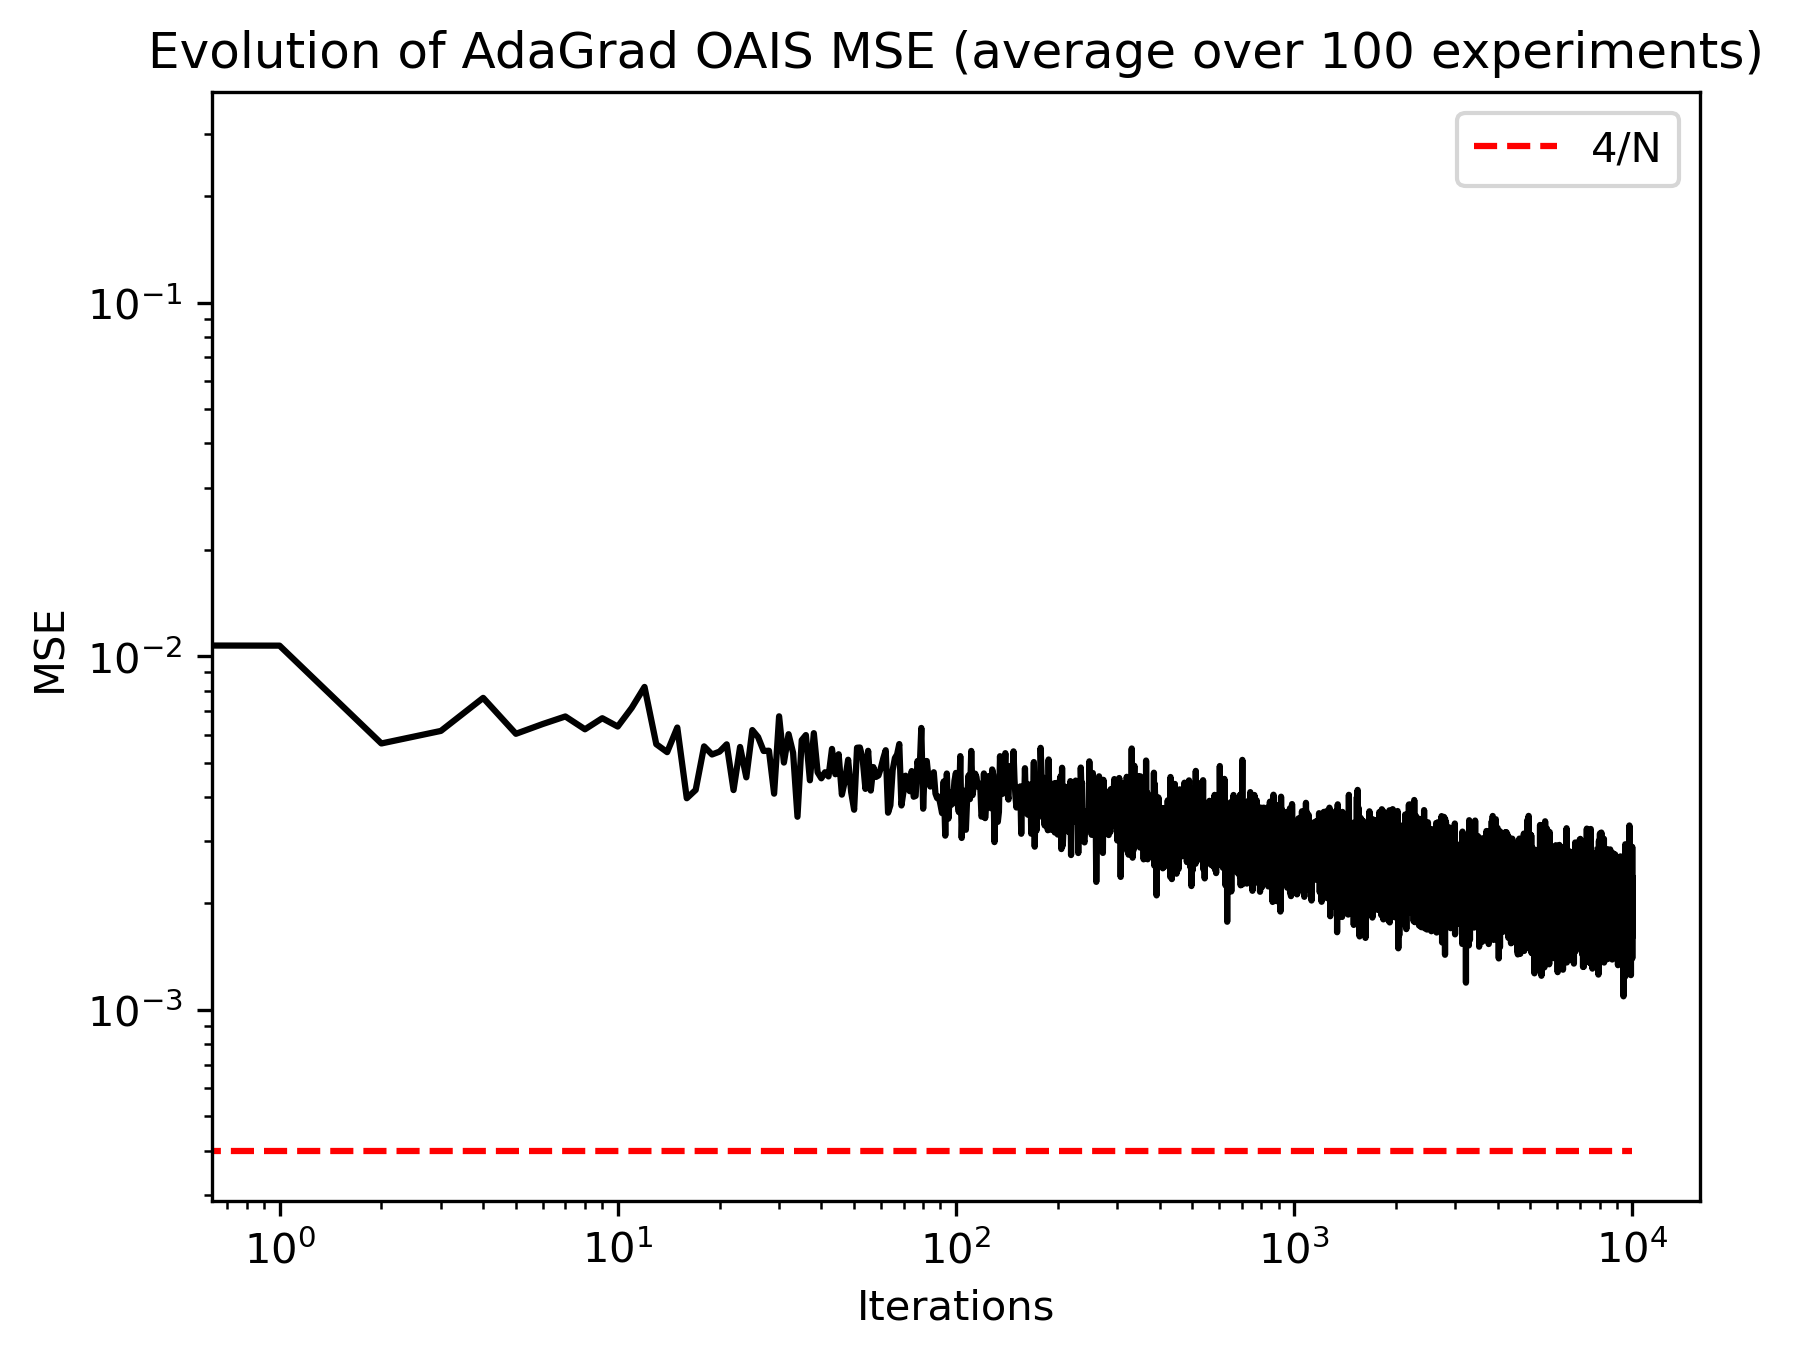

In [ ]:
GT = 0.195595
err_arr = np.abs(np.array(results_array_AdaGrad) - GT)**2
plt.plot(np.mean(err_arr, axis=0), color="black")
plt.hlines(4/Niter, 0, Niter, color="red", label="4/N", linestyle="dashed")
plt.title(f"Evolution of {optimiser} OAIS MSE (average over {nexperiments} experiments)")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend()
plt.show()



In [6]:
from nsimpkg.random_variables import average_normal_dist

In [7]:
res = []
for exp in tqdm(distribution_array_AdaGrad):
    exp_res = []
    for d in exp:
        samples = d.sample(100)
        w = pi.pdf(samples)/d.pdf(samples)
        exp_res.append(np.mean(w*phi(samples)))
    res.append(exp_res)

 92%|█████████▏| 92/100 [03:21<00:17,  2.19s/it]


KeyboardInterrupt: 

In [ ]:
np.array(res)

array([[0.        , 0.16494331, 0.12602125, ..., 0.25159356, 0.14096631,
        0.20103063],
       [0.        , 0.26811397, 0.14331234, ..., 0.25979657, 0.20966599,
        0.13978546],
       [0.        , 0.12671788, 0.14426029, ..., 0.23489786, 0.16989244,
        0.24432568],
       ...,
       [0.        , 0.16572885, 0.14215237, ..., 0.15151766, 0.21216588,
        0.17176061],
       [0.        , 0.24534671, 0.16571721, ..., 0.10015336, 0.18024628,
        0.19023579],
       [1.47552849, 0.31367068, 0.1469327 , ..., 0.10001205, 0.18004139,
        0.24008698]])

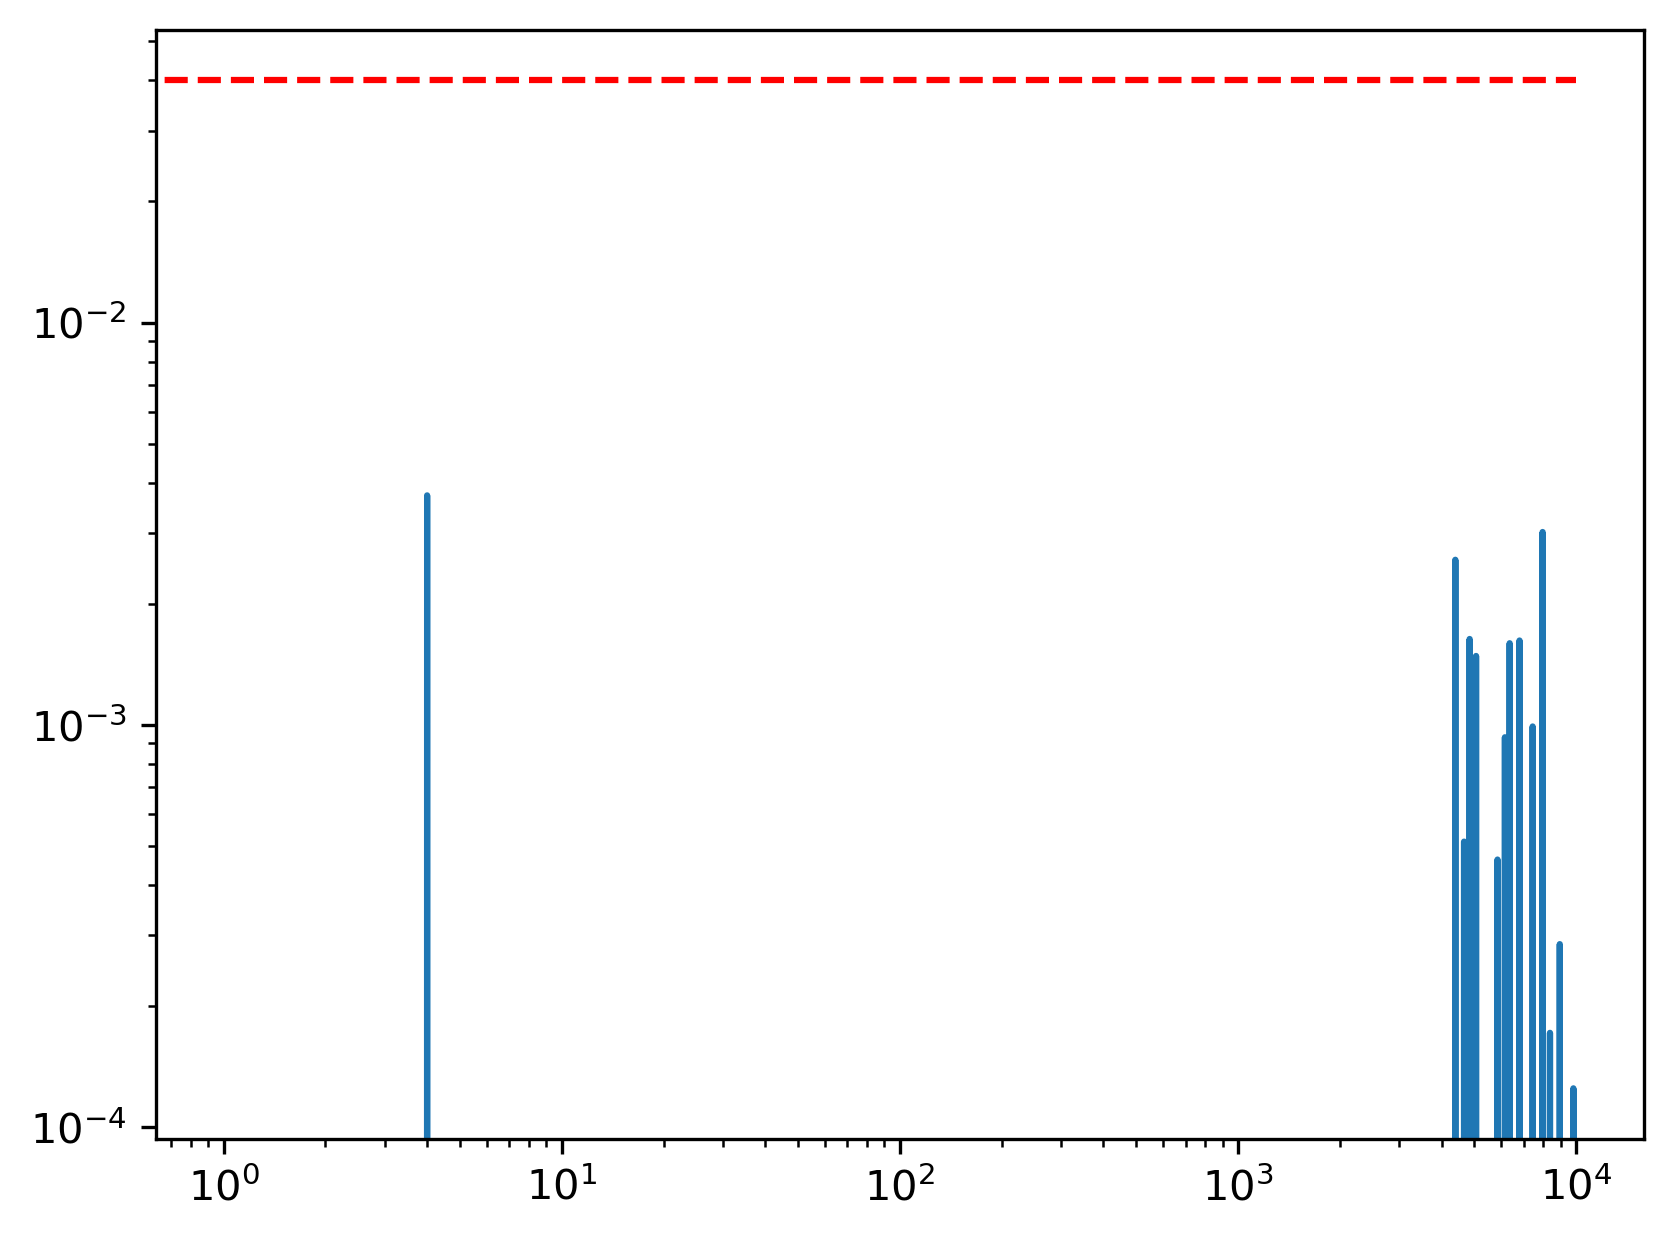

In [75]:
plt.plot(np.mean((np.array(res)-GT), axis=0))
plt.hlines(4/N, 0, Niter, color="red", label="4/N", linestyle="dashed")
plt.xscale("log")
plt.yscale("log")